# Global Analyses Notebook

In [1]:
%matplotlib inline
import numpy as np
from scipy.stats import ttest_ind, ttest_1samp
import scipy.stats as stats
import pandas as pd
from pathlib import Path
from importlib import reload

import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib_venn import venn2, venn3
import seaborn as sns

import TreeMazeAnalyses2,Analyses.tree_maze_functions as tmf
import TreeMazeAnalyses2.Analyses.experiment_info as ei
import TreeMazeAnalyses2.Analyses.plot_functions as pf
import TreeMazeAnalyses2.Utils.robust_stats as rs

import ipywidgets as widgets
from ipywidgets import interact, fixed, interact_manual

from joblib import delayed, Parallel

import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)
warnings.filterwarnings("ignore", category=UserWarning)

## 2/27/2022
# Zone Encoder Analyses

In [43]:
%%time
ei = reload(ei)
info = ei.SummaryInfo()

CPU times: user 58.2 ms, sys: 3.96 ms, total: 62.1 ms
Wall time: 60.6 ms


In [3]:
#info.get_analyses_table(overwrite=True)

track_data  spikes  binned_spikes  fr  pos_zones  event_table  \
Li_T3g_052818           1       1              1   1        1.0          1.0   
Li_OF_052818            1       1              1   1       -1.0         -1.0   
Li_T3g_052918           1       1              1   1        1.0          1.0   
Li_OF_052918            1       1              1   1       -1.0         -1.0   
Li_OF_053018            1       1              1   1       -1.0         -1.0   
...                   ...     ...            ...  ..        ...          ...   
Mi_OF_021220            1       1              1   1       -1.0         -1.0   
Mi_OF_021320            0       0              0   0       -1.0         -1.0   
Mi_OF_021720            1       1              1   1       -1.0         -1.0   
Mi_OF_021820            1       1              1   1       -1.0         -1.0   
Mi_OF_022020            0       0              0   0       -1.0         -1.0   

               trial_zone_rates  zone_rates_comps  zone_rates_remap  \
Li_T3g_052818               0.0               1.0               1.0   
Li_OF_052818               -1.0              -1.0              -1.0   
Li_T3g_052918               0.0               1.0               1.0   
Li_OF_052918               -1.0              -1.0              -1.0   
Li_OF_053018               -1.0              -1.0              -1.0   
...                         ...               ...               ...   
Mi_OF_021220               -1.0              -1.0              -1.0   
Mi_OF_021320               -1.0              -1.0              -1.0   
Mi_OF_021720               -1.0              -1.0              -1.0   
Mi_OF_021820               -1.0              -1.0              -1.0   
Mi_OF_022020               -1.0              -1.0              -1.0   

               pop_zone_rates_remap  bal_conds_seg_rates  \
Li_T3g_052818                   1.0                  1.0   
Li_OF_052818                   -1.0                 -1.0   
Li_T3g_052918                   1.0                  1.0   
Li_OF_052918                   -1.0                 -1.0   
Li_OF_053018                   -1.0                 -1.0   
...                             ...                  ...   
Mi_OF_021220                   -1.0                 -1.0   
Mi_OF_021320                   -1.0                 -1.0   
Mi_OF_021720                   -1.0                 -1.0   
Mi_OF_021820                   -1.0                 -1.0   
Mi_OF_022020                   -1.0                 -1.0   

               bal_conds_seg_boot_rates  zone_encoder_lag  zone_encoder_cue  \
Li_T3g_052818                       0.0               1.0               1.0   
Li_OF_052818                       -1.0              -1.0              -1.0   
Li_T3g_052918                       0.0               1.0               1.0   
Li_OF_052918                       -1.0              -1.0              -1.0   
Li_OF_053018                       -1.0              -1.0              -1.0   
...                                 ...               ...               ...   
Mi_OF_021220                       -1.0              -1.0              -1.0   
Mi_OF_021320                       -1.0              -1.0              -1.0   
Mi_OF_021720                       -1.0              -1.0              -1.0   
Mi_OF_021820                       -1.0              -1.0              -1.0   
Mi_OF_022020                       -1.0              -1.0              -1.0   

               scores  encoding_models  
Li_T3g_052818    -1.0             -1.0  
Li_OF_052818      1.0              1.0  
Li_T3g_052918    -1.0             -1.0  
Li_OF_052918      1.0              1.0  
Li_OF_053018      1.0              1.0  
...               ...              ...  
Mi_OF_021220      1.0              1.0  
Mi_OF_021320      0.0              0.0  
Mi_OF_021720      1.0              1.0  
Mi_OF_021820      1.0              1.0  
Mi_OF_022020      0.0              0.0  

[409 rows x 16 columns]

In [21]:
el = info.get_zone_encoder_lag(overwrite=True)

In [98]:
el_m = el[el.split=='test'].groupby(['unit_id', 'session', 'subject', 'cl_name','decay','unit_type','lag'])['score'].mean().reset_index()
el_m.loc[el_m.score<-1]=np.nan

<AxesSubplot:xlabel='lag', ylabel='score'>

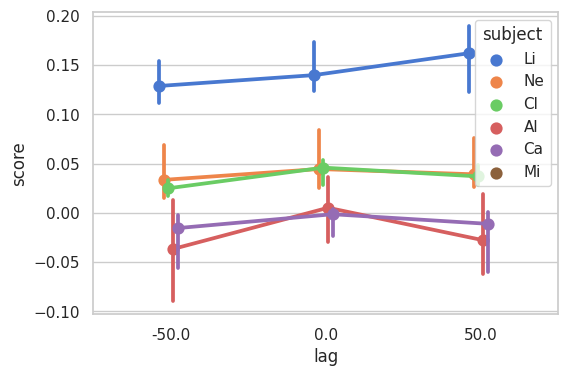

In [101]:
f,ax=plt.subplots(dpi=100)
sns.pointplot(data=el_m[el_m.unit_type=='cell'], x='lag', y='score', estimator=np.median, hue='subject', hue_order=info.subjects,ax=ax,dodge=True)
#sns.pointplot(data=el_m, x='lag', y='score', estimator=np.median, hue='subject', hue_order=info.subjects,ax=ax,dodge=True)

<AxesSubplot:xlabel='lag', ylabel='score'>

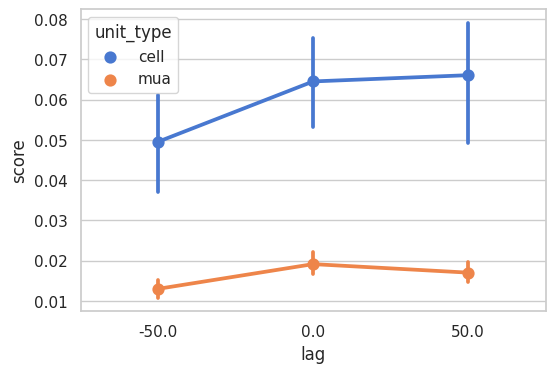

In [103]:
f,ax=plt.subplots(dpi=100)
sns.pointplot(data=el_m, x='lag', y='score', estimator=np.median, hue='unit_type', hue_order=['cell','mua'],ax=ax)
#sns.pointplot(data=el_m, x='lag', y='score', estimator=np.median, hue_order=['cell','mua'],ax=ax)

In [44]:
ec = info.get_zone_encoder_cue()

In [45]:
ec.head()

session_unit_id  split  fold metric     score  lag    decay cue_type  \
0                0  train     0     r2  0.115362   50  inverse     none   
1                1  train     0     r2  0.041789   50  inverse     none   
2                0   test     0     r2  0.071204   50  inverse     none   
3                1   test     0     r2  0.019553   50  inverse     none   
4                0  train     1     r2  0.083367   50  inverse     none   

  unit_type subject        session  session_pct_cov tt tt_cl  \
0       mua      Li  Li_T3g_052818              NaN  2    11   
1       mua      Li  Li_T3g_052818              NaN  2    14   
2       mua      Li  Li_T3g_052818              NaN  2    11   
3       mua      Li  Li_T3g_052818              NaN  2    14   
4       mua      Li  Li_T3g_052818              NaN  2    11   

                        cl_name task  unit_id  
0  Li_T3g_052818-tt2_d16.5_cl11  T3g        0  
1  Li_T3g_052818-tt2_d16.5_cl14  T3g        1  
2  Li_T3g_052818-tt2_d16.5_cl11  T3g        0  
3  Li_T3g_052818-tt2_d16.5_cl14  T3g        1  
4  Li_T3g_052818-tt2_d16.5_cl11  T3g        0

In [82]:
ec_m = ec[ec.split=='test'].groupby(['unit_id', 'session', 'subject', 'cl_name','decay','unit_type','lag', 'cue_type'])['score'].mean().reset_index()

cat_type = pd.api.types.CategoricalDtype(categories=["none", "fixed", "inter"], ordered=True)
ec_m['cue_type'] = ec_m['cue_type'].astype(cat_type)

In [91]:
ec_m.loc[ec_m.score<-1]=np.nan

<AxesSubplot:xlabel='cue_type', ylabel='score'>

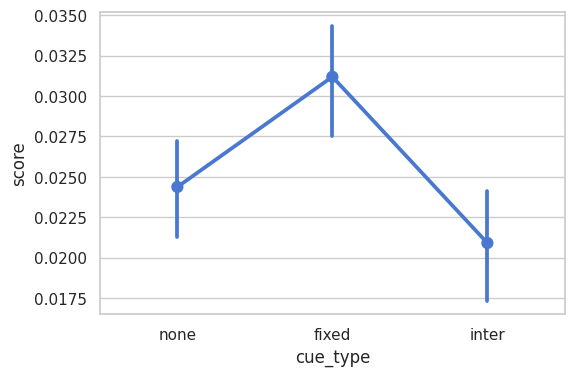

In [95]:
f,ax=plt.subplots(dpi=100)
#sns.pointplot(data=ec_m, x='cue_type', y='score', estimator=np.median, hue='unit_type', hue_order=['cell','mua'],ax=ax, dodge=0.2)
sns.pointplot(data=ec_m, x='cue_type', y='score', estimator=np.median, hue_order=['cell','mua'],ax=ax, dodge=0.2)

<AxesSubplot:xlabel='cue_type', ylabel='score'>

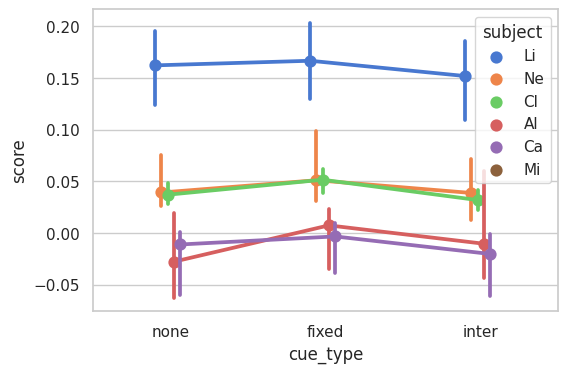

In [97]:
f,ax=plt.subplots(dpi=100)
#sns.pointplot(data=ec_m, x='cue_type', y='score', estimator=np.median, hue='subject', hue_order=info.subjects,ax=ax,dodge=0.2)
sns.pointplot(data=ec_m[ec_m.unit_type=='cell'], x='cue_type', y='score', estimator=np.median, hue='subject', hue_order=info.subjects,ax=ax,dodge=0.2)

<AxesSubplot:xlabel='cue_type', ylabel='score'>

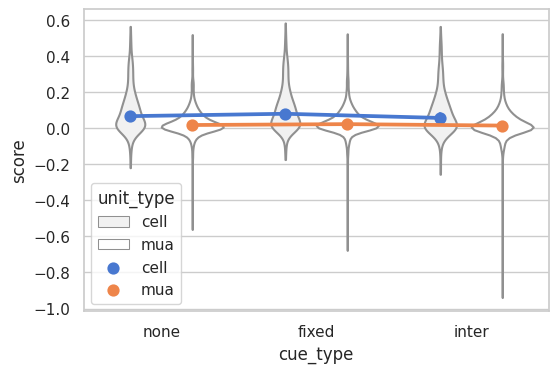

In [124]:
f,ax=plt.subplots(dpi=100)
sns.violinplot(data=ec_m, x='cue_type', y='score', hue='unit_type', hue_order=['cell','mua'],ax=ax, alpha=0.1, color='white',cut=0, inner=None)
sns.pointplot(data=ec_m, x='cue_type', y='score', estimator=np.median, hue='unit_type', hue_order=['cell','mua'],ax=ax, dodge=0.4)

In [175]:

cue_types = ['none','fixed', 'inter']

x_idx = ec_m.cue_type=='none'
y_idx = ec_m.cue_type=='fixed'
z_idx = ec_m.cue_type=='inter'

X = pd.DataFrame(index=range(ec_m.unit_id.max().astype(int)+1))

X.loc[ec_m.loc[x_idx].unit_id,'none'] = ec_m.score[x_idx].values
X.loc[ec_m.loc[y_idx].unit_id,'fixed'] = ec_m.score[y_idx].values
X.loc[ec_m.loc[z_idx].unit_id,'inter'] = ec_m.score[z_idx].values
X.loc[ec_m.loc[x_idx].unit_id,'unit_type'] = ec_m.unit_type[x_idx].values
X.loc[ec_m.loc[x_idx].unit_id,'subject'] = ec_m.subject[x_idx].values
X.loc[ec_m.loc[x_idx].unit_id, 'session'] = ec_m.session[x_idx].values

    

SyntaxError: invalid syntax (3947669790.py, line 24)

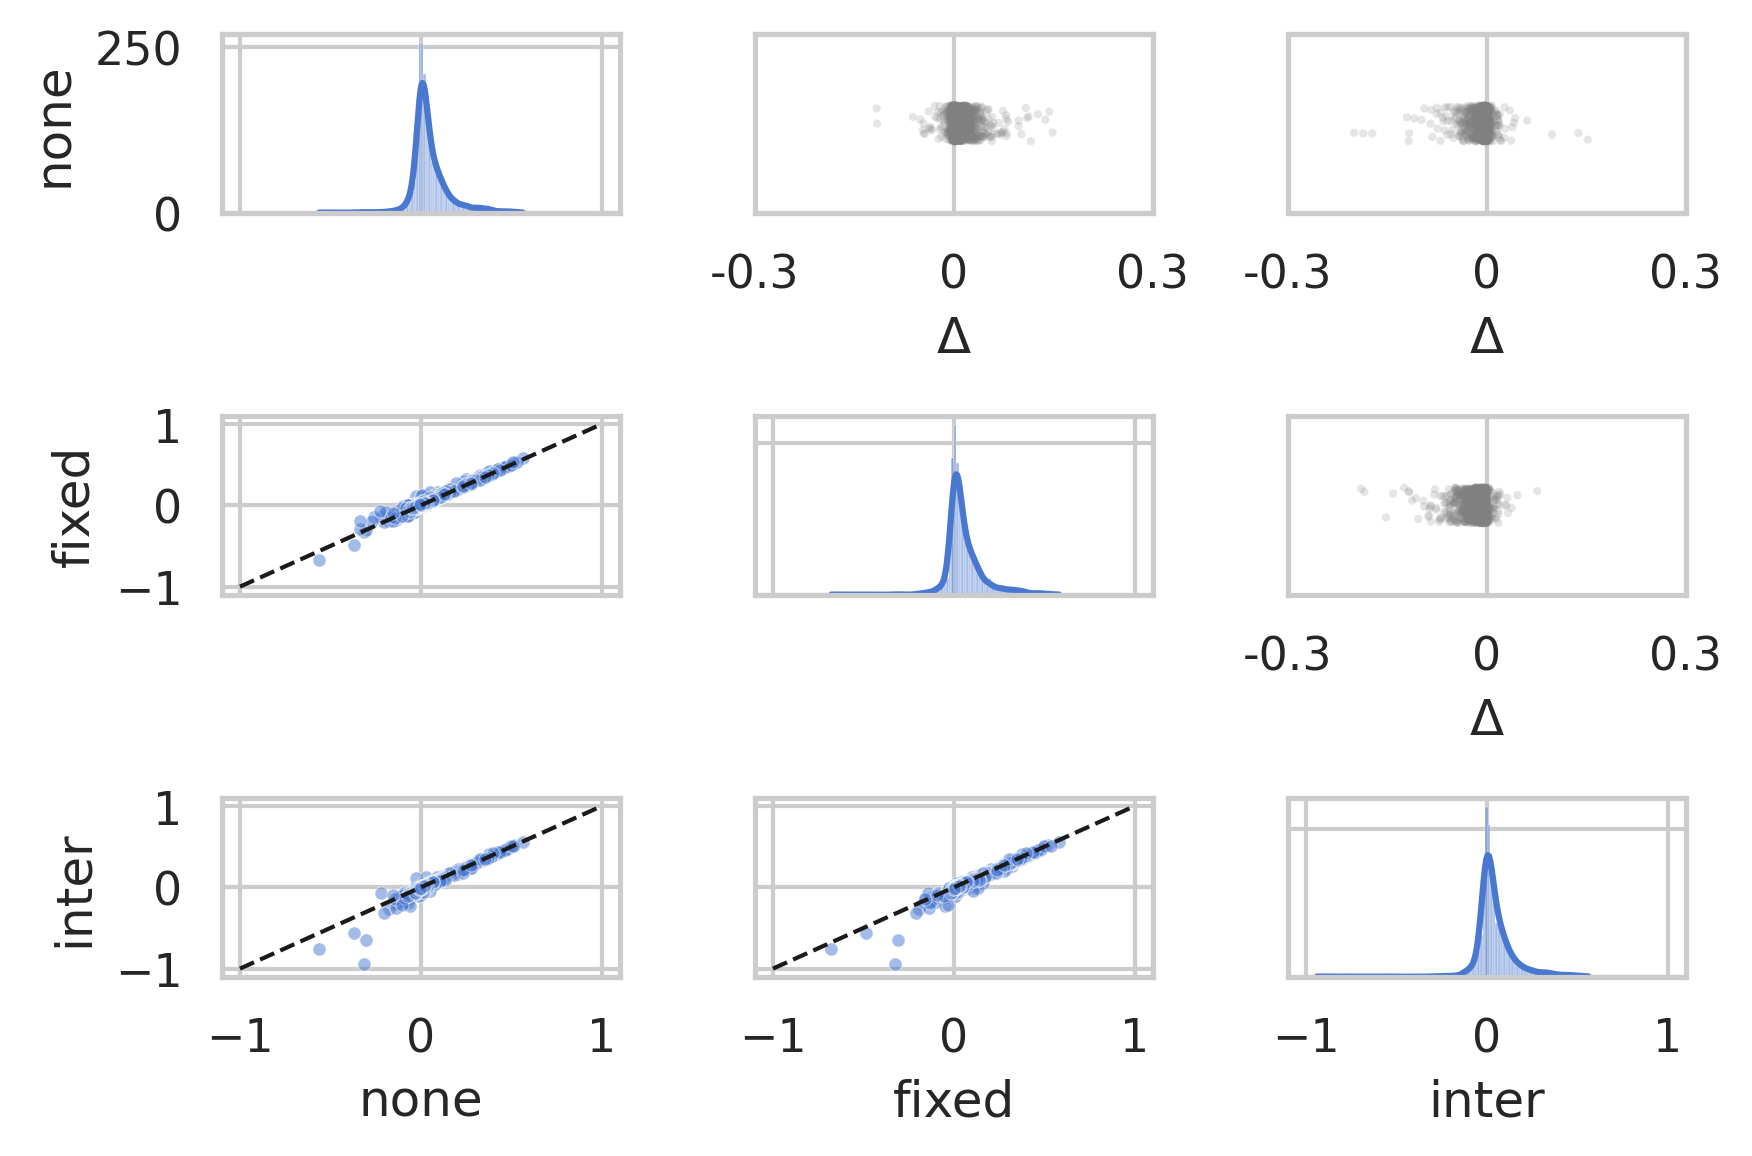

In [213]:

f,ax = plt.subplots(3,3,dpi=300,constrained_layout=True,)

for ii, cue1 in enumerate(cue_types):
    for jj, cue2 in enumerate(cue_types):
        
        if ii==jj:
            sns.histplot(x=X[cue1], ax=ax[ii,jj],kde=True)
            ax[ii,jj].set_xlim([-1.1,1.1])
            ax[ii,jj].set_ylabel(cue1)
            
        elif jj>ii:
            pass
            
        else:
            sns.scatterplot(data=X, y=cue1, x=cue2, alpha=0.5, ax=ax[ii,jj],s=10)
            ax[ii,jj].plot([-1,1],[-1,1],'--k',lw=1)
        
            ax[ii,jj].set_xlim([-1.1,1.1])
            ax[ii,jj].set_ylim([-1.1,1.1])
        if ii<2:
            ax[ii,jj].set_xticklabels([''])
            ax[ii,jj].set_xlabel('')
        if jj>0:
            ax[ii,jj].set_yticklabels([''])
            ax[ii,jj].set_ylabel('')
            
        if jj>ii:
            sns.stripplot(x=X[cue2]-X[cue1], ax=ax[ii,jj], color='gray', s=2,alpha=0.2)
            ax[ii,jj].set_xlim([-0.25,0.25])
            ax[ii,jj].set_xticks([-0.3,0,0.3])
            ax[ii,jj].set_xticklabels([-0.3,0,0.3])
            ax[ii,jj].set_xlabel(r'$\Delta$')
            
plt.tight_layout()

In [166]:
cue_types[::-1]

['inter', 'fixed', 'none']

In [141]:
X[ec_m.loc[y_idx].unit_id,'fixed']

TypeError: '(0          0.0
3          1.0
6          2.0
9          3.0
12         4.0
         ...  
5604    1868.0
5607    1869.0
5610    1870.0
5613    1871.0
5616    1872.0
Name: unit_id, Length: 1873, dtype: float64, 'fixed')' is an invalid key

In [133]:
ec_m.pivot(index='unit_id', columns='cue_type', values=['score','unit_type'])

ValueError: Index contains duplicate entries, cannot reshape

In [67]:
ec_m.loc[ec_m.score<=-1].session.unique()

array(['Li_T3g_062018', 'Li_T3g_062718', 'Li_T3g_062818', 'Li_T3g_071118',
       'Li_T3g_080318', 'Ne_T3g_060118', 'NE_T3gj_062818',
       'NE_T3g_070518', 'NE_T3g_071018', 'Cl_T3g_112318', 'Cl_T3g_113018',
       'Cl_T3g_120318', 'Cl_T3g_121418', 'Al_T3g_092618', 'Al_T3g_092818',
       'Al_T3g_101718', 'Ca_T3g_030619', 'Ca_T3g_032919', 'Ca_T3g_042319'],
      dtype=object)

session_unit_id  split  fold metric     score  lag    decay cue_type  \
0                    0  train     0     r2  0.115362   50  inverse     none   
1                    1  train     0     r2  0.041789   50  inverse     none   
2                    0   test     0     r2  0.071204   50  inverse     none   
3                    1   test     0     r2  0.019553   50  inverse     none   
4                    0  train     1     r2  0.083367   50  inverse     none   
...                ...    ...   ...    ...       ...  ...      ...      ...   
56185                0   test     2     r2 -0.027481   50  inverse    inter   
56186                0  train     3     r2  0.017226   50  inverse    inter   
56187                0   test     3     r2  0.013672   50  inverse    inter   
56188                0  train     4     r2  0.017359   50  inverse    inter   
56189                0   test     4     r2  0.003896   50  inverse    inter   

      unit_type subject        session  session_pct_cov  tt tt_cl  \
0           mua      Li  Li_T3g_052818              NaN   2    11   
1           mua      Li  Li_T3g_052818              NaN   2    14   
2           mua      Li  Li_T3g_052818              NaN   2    11   
3           mua      Li  Li_T3g_052818              NaN   2    14   
4           mua      Li  Li_T3g_052818              NaN   2    11   
...         ...     ...            ...              ...  ..   ...   
56185       mua      Ca  Ca_T3g_042319              NaN  11    10   
56186       mua      Ca  Ca_T3g_042319              NaN  11    10   
56187       mua      Ca  Ca_T3g_042319              NaN  11    10   
56188       mua      Ca  Ca_T3g_042319              NaN  11    10   
56189       mua      Ca  Ca_T3g_042319              NaN  11    10   

                              cl_name task  unit_id  
0        Li_T3g_052818-tt2_d16.5_cl11  T3g        0  
1        Li_T3g_052818-tt2_d16.5_cl14  T3g        1  
2        Li_T3g_052818-tt2_d16.5_cl11  T3g        0  
3        Li_T3g_052818-tt2_d16.5_cl14  T3g        1  
4        Li_T3g_052818-tt2_d16.5_cl11  T3g        0  
...                               ...  ...      ...  
56185  Ca_T3g_042319-tt11_d19.75_cl10  T3g     1872  
56186  Ca_T3g_042319-tt11_d19.75_cl10  T3g     1872  
56187  Ca_T3g_042319-tt11_d19.75_cl10  T3g     1872  
56188  Ca_T3g_042319-tt11_d19.75_cl10  T3g     1872  
56189  Ca_T3g_042319-tt11_d19.75_cl10  T3g     1872  

[56190 rows x 17 columns]

In [5]:
overwrite=False
info.run_analyses(which='zone_encoder_lag', task='T3', verbose=True, overwrite=overwrite)

Processing Session Li_T3g_052818
Session Processing Completed: 0.09s

Processing Session Li_T3g_052918
Session Processing Completed: 0.03s

Processing Session Li_T3g_053018
Session Processing Completed: 0.03s

Processing Session Li_T3g_053118
Session Processing Completed: 0.03s

Processing Session Li_T3g_060118
Session Processing Completed: 0.03s

Processing Session Li_T3g_060418
Session Processing Completed: 0.03s

Processing Session Li_T3i_060518
Session Processing Completed: 0.03s

Processing Session Li_T3i_060618
Session Processing Completed: 0.03s

Processing Session Li_T3i_060818
Session Processing Completed: 0.11s

Processing Session Li_T3i_061118
Session Processing Completed: 0.03s

Processing Session Li_T3i_061218
Traceback (most recent call last):
  File "/home/alexgonzalez/Documents/TreeMazeAnalyses2/Analyses/experiment_info.py", line 86, in run_analyses
    session_info = SubjectSessionInfo(subject, session)
  File "/home/alexgonzalez/Documents/TreeMazeAnalyses2/Analyses/ex

/home/alexgonzalez/Documents/TreeMazeAnalyses2/Utils/robust_stats.py:252: RuntimeWarning: divide by zero encountered in true_divide
  return 1 - ((y - y_hat) ** 2).sum(axis=1) / ((y - y_bar) ** 2).sum(axis=1)
/home/alexgonzalez/Documents/TreeMazeAnalyses2/Utils/robust_stats.py:252: RuntimeWarning: invalid value encountered in true_divide
  return 1 - ((y - y_hat) ** 2).sum(axis=1) / ((y - y_bar) ** 2).sum(axis=1)
/home/alexgonzalez/Documents/TreeMazeAnalyses2/Utils/robust_stats.py:252: RuntimeWarning: divide by zero encountered in true_divide
  return 1 - ((y - y_hat) ** 2).sum(axis=1) / ((y - y_bar) ** 2).sum(axis=1)
/home/alexgonzalez/Documents/TreeMazeAnalyses2/Utils/robust_stats.py:252: RuntimeWarning: invalid value encountered in true_divide
  return 1 - ((y - y_hat) ** 2).sum(axis=1) / ((y - y_bar) ** 2).sum(axis=1)
/home/alexgonzalez/Documents/TreeMazeAnalyses2/Utils/robust_stats.py:252: RuntimeWarning: divide by zero encountered in true_divide
  return 1 - ((y - y_hat) ** 2).su

Analysis zone_encoder_lag completed.
Session Processing Completed: 2.45s

Processing Session Cl_T3g_120118_0001
Traceback (most recent call last):
  File "/home/alexgonzalez/Documents/TreeMazeAnalyses2/Analyses/experiment_info.py", line 1758, in run_analyses
    _ = method(overwrite=True, **params)
  File "/home/alexgonzalez/Documents/TreeMazeAnalyses2/Analyses/experiment_info.py", line 2368, in get_zone_encoder_lag
    df = tmf.zone_encoding_lag_analysis(self)
  File "/home/alexgonzalez/Documents/TreeMazeAnalyses2/Analyses/tree_maze_functions.py", line 4548, in zone_encoding_lag_analysis
    ze = ZoneEncoder(session_info)
  File "/home/alexgonzalez/Documents/TreeMazeAnalyses2/Analyses/tree_maze_functions.py", line 3401, in __init__
    self.ta = TrialAnalyses(session_info, **trial_params)
  File "/home/alexgonzalez/Documents/TreeMazeAnalyses2/Analyses/tree_maze_functions.py", line 1737, in __init__
    be = session_info.get_event_behavior()
  File "/home/alexgonzalez/Documents/TreeMaz

In [ ]:
overwrite=True
info.run_analyses(which='zone_encoder_cue', task='T3', verbose=True, overwrite=overwrite)

## 1/7/2021
plot to save figures

In [2]:
%%time
ei = reload(ei)
info = ei.SummaryInfo()

CPU times: user 38.3 ms, sys: 8.25 ms, total: 46.6 ms
Wall time: 45.4 ms


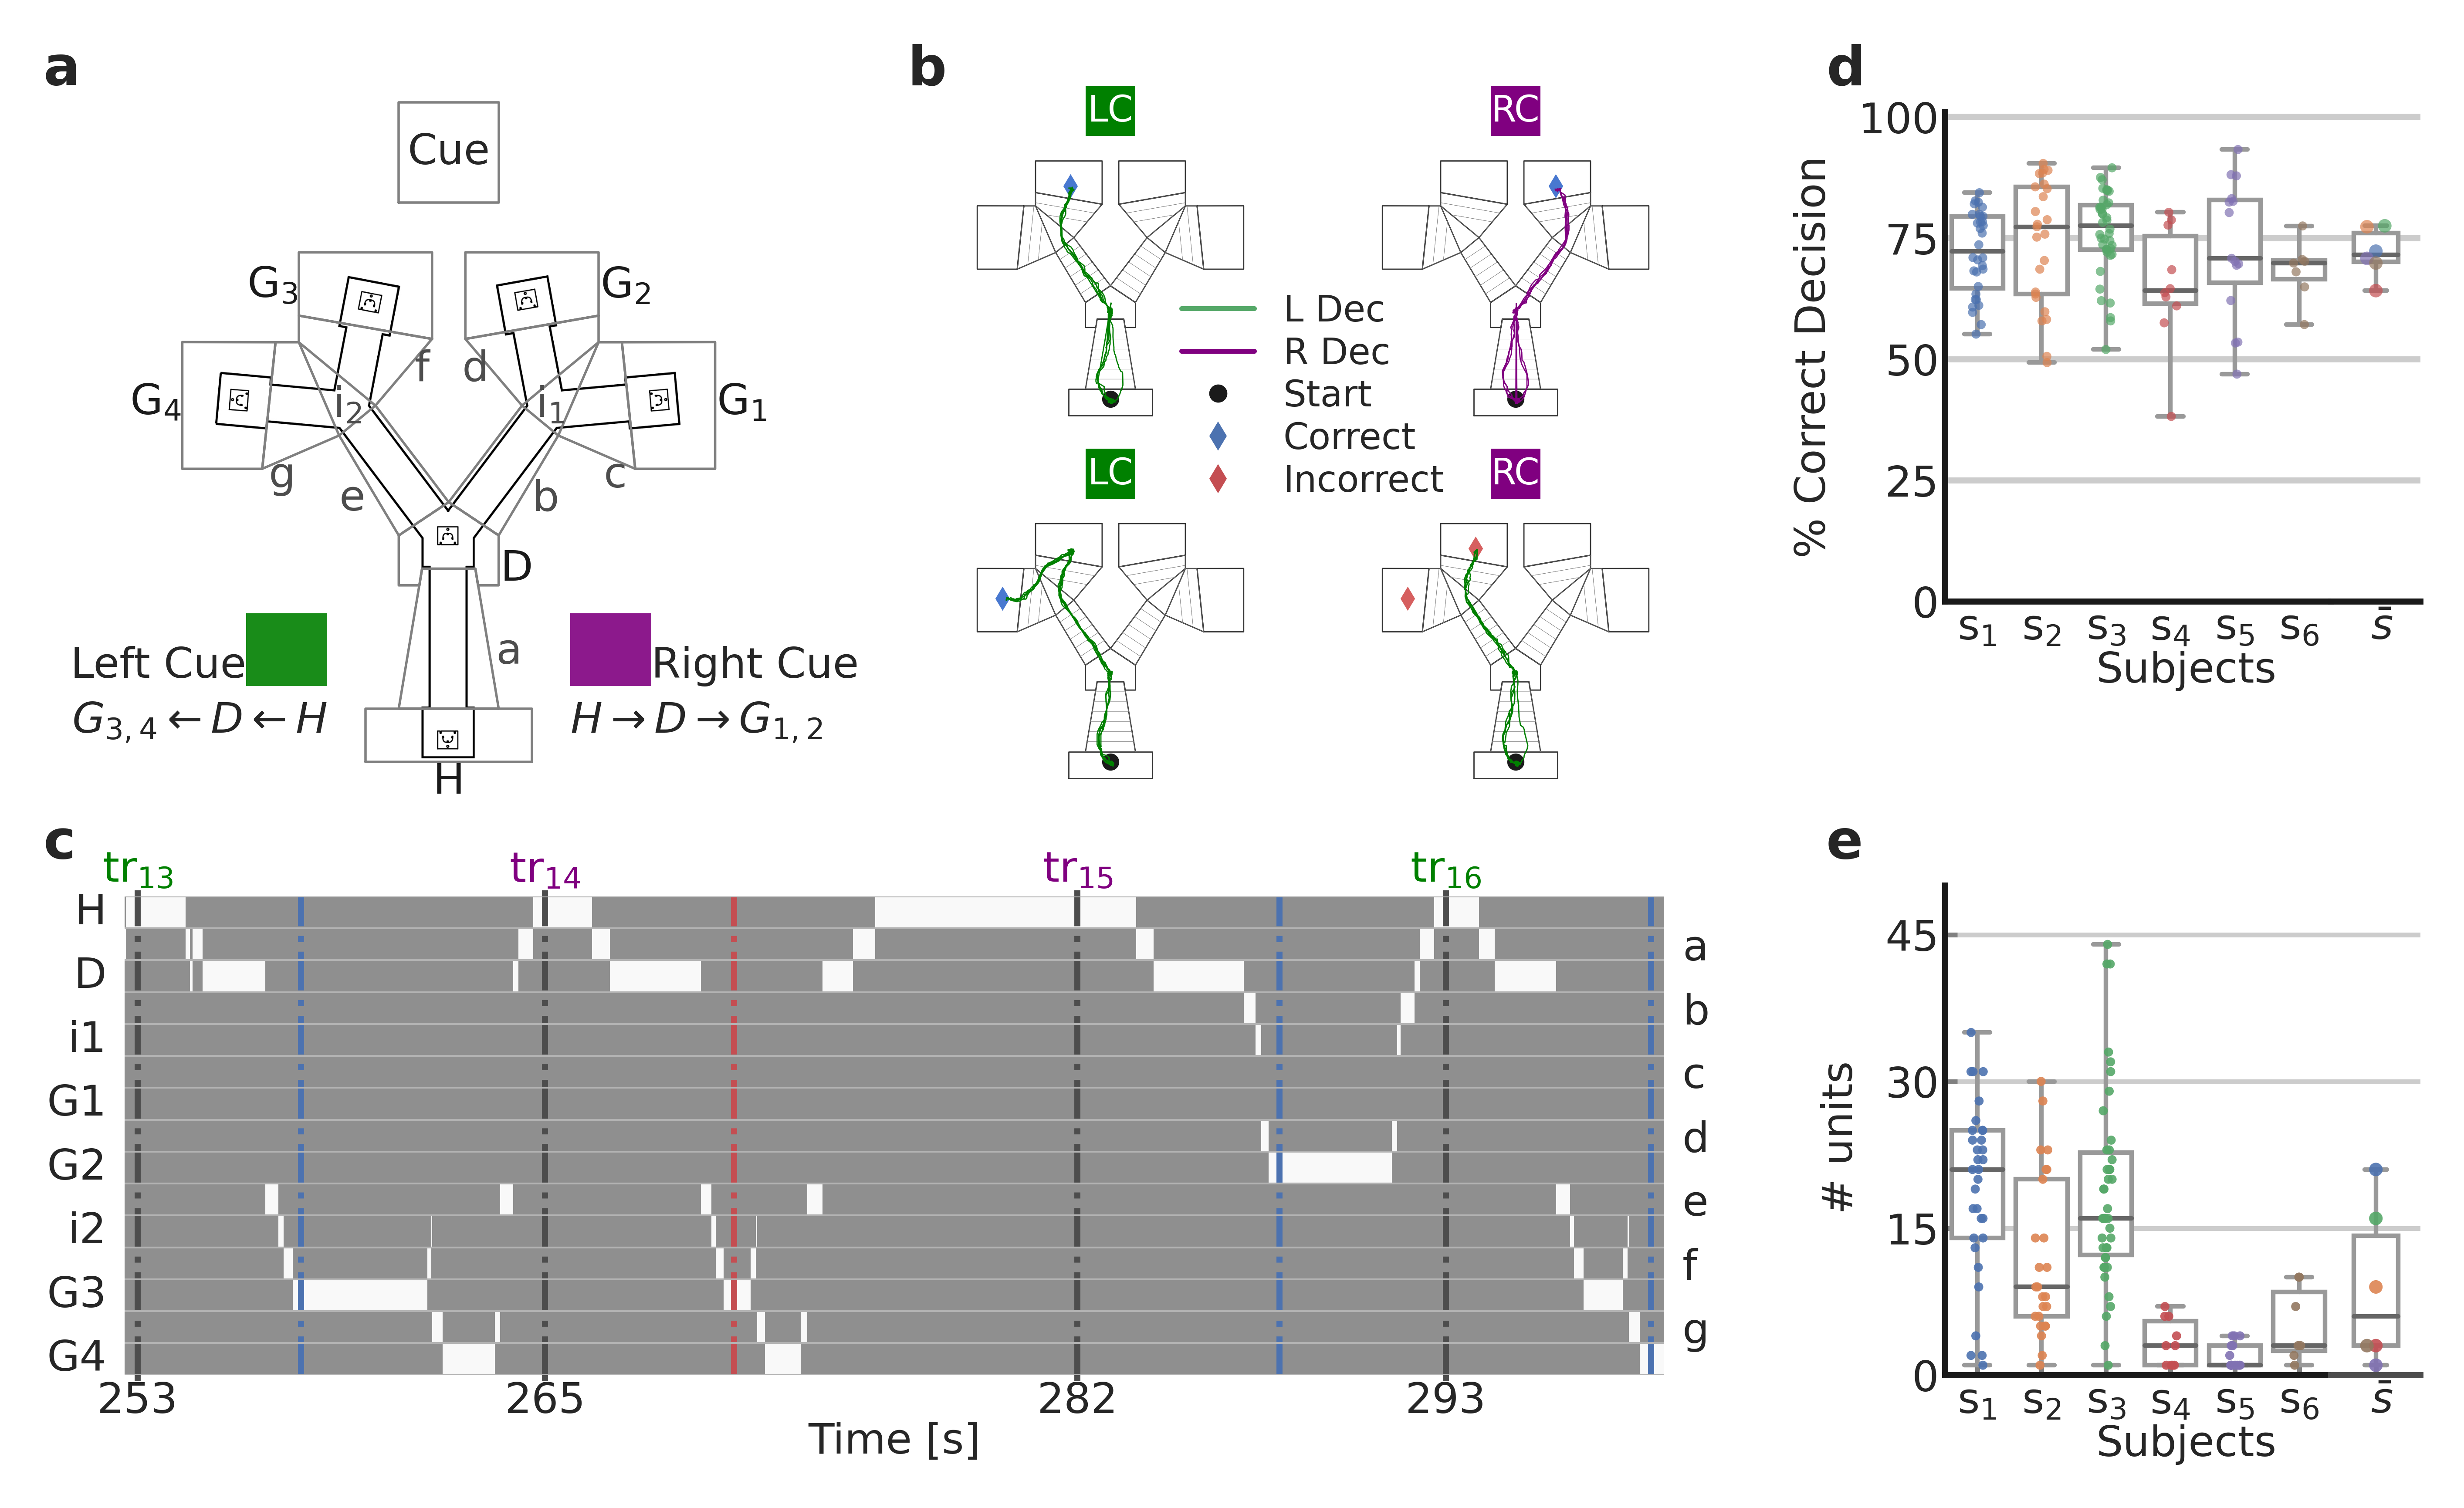

In [3]:
info.plot(fig_id=1,save=True)

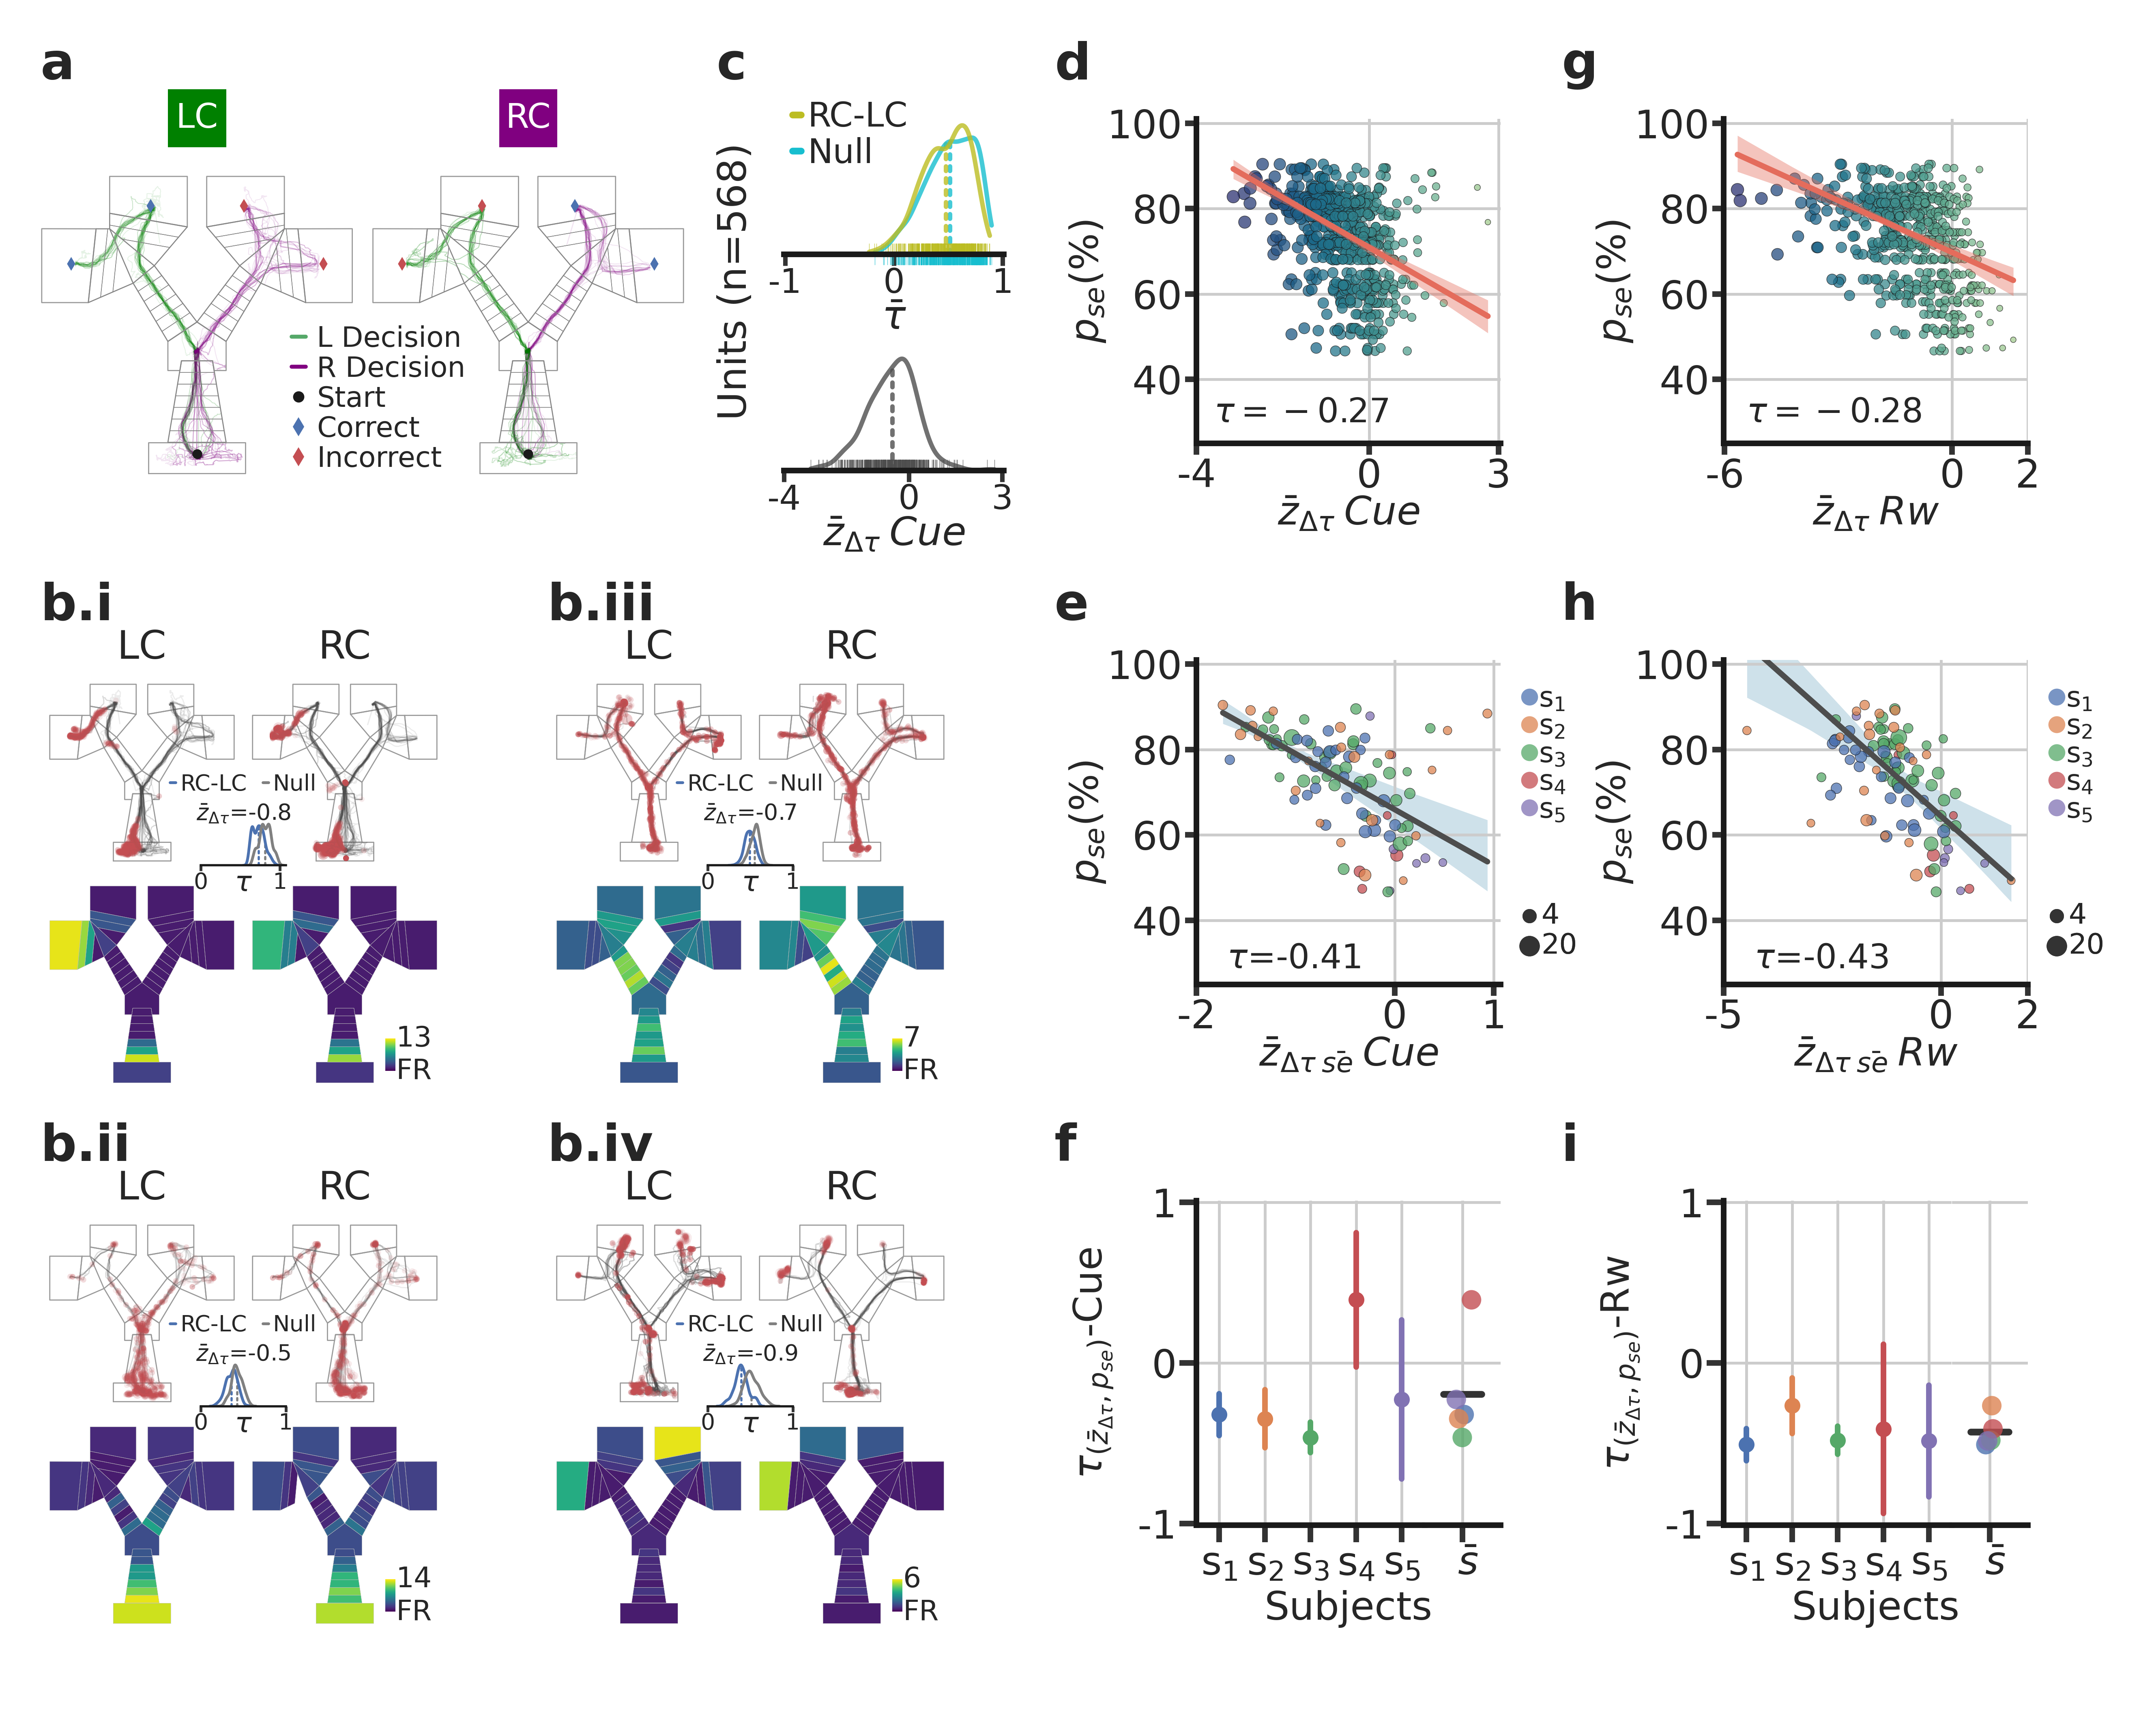

In [4]:
info.plot(fig_id=2,save=True)

## 12/30/2021
get a cache verion of balanced condition averaged bootstrapped rates for subsegments. this analysis was necessary because i needed a to have handy bootstrapped estimates for neurons.

In [2]:
%%time
ei = reload(ei)
info = ei.SummaryInfo()

CPU times: user 20.1 ms, sys: 8.03 ms, total: 28.2 ms
Wall time: 26.8 ms


In [3]:
info.update_paths()

In [3]:
%%time
overwrite=True
info.run_analyses(which='bal_conds_seg_boot_rates', task='T3', overwrite=overwrite)

...........Analysis bal_conds_seg_boot_rates did not find the dependent files.
.............Analysis bal_conds_seg_boot_rates did not find the dependent files.
...............Analysis bal_conds_seg_boot_rates did not find the dependent files.
...Analysis bal_conds_seg_boot_rates did not find the dependent files.
..............Analysis bal_conds_seg_boot_rates did not find the dependent files.
..Analysis bal_conds_seg_boot_rates did not find the dependent files.
..Analysis bal_conds_seg_boot_rates did not find the dependent files.
...........................Analysis bal_conds_seg_boot_rates did not find the dependent files.
.....Traceback (most recent call last):
  File "/home/alexgonzalez/Documents/TreeMazeAnalyses2/Analyses/experiment_info.py", line 1731, in run_analyses
    _ = method(overwrite=True, **params)
  File "/home/alexgonzalez/Documents/TreeMazeAnalyses2/Analyses/experiment_info.py", line 2328, in get_bal_conds_seg_boot_rates
    df = trial_analyses.get_avg_seg_rates_boot(s

## 12/16/2021
## rerun of session remapping analyses

In [2]:
%%time
ei = reload(ei)
info = ei.SummaryInfo()

CPU times: user 24.6 ms, sys: 17 µs, total: 24.6 ms
Wall time: 23.7 ms


### Default Parameters Run

In [10]:
%%time
overwrite=True
info.run_analyses(which='zone_rates_remap', task='T3', overwrite=overwrite)

...........Analysis zone_rates_remap did not find the dependent files.
.............Analysis zone_rates_remap did not find the dependent files.
...............Analysis zone_rates_remap did not find the dependent files.
...Analysis zone_rates_remap did not find the dependent files.
..............Analysis zone_rates_remap did not find the dependent files.
..Analysis zone_rates_remap did not find the dependent files.
..Analysis zone_rates_remap did not find the dependent files.
...........................Analysis zone_rates_remap did not find the dependent files.
.....error getting the trial sets CR_bo
Traceback (most recent call last):
  File "/home/alexgonzalez/Documents/TreeMazeAnalyses2/Analyses/experiment_info.py", line 1592, in run_analyses
    _ = method(overwrite=True, **params)
  File "/home/alexgonzalez/Documents/TreeMazeAnalyses2/Analyses/experiment_info.py", line 2097, in get_zone_rates_remap
    df = trial_analyses.all_zone_remapping_analyses(corr_method=params['corr_method']

### end trial at first goal

In [9]:
%%time
params=dict(trial_end='tE_1')
info.run_analyses(which='zone_rates_remap', task='T3', overwrite=True,  **params)

...........Analysis zone_rates_remap did not find the dependent files.
.............Analysis zone_rates_remap did not find the dependent files.
...............Analysis zone_rates_remap did not find the dependent files.
...Analysis zone_rates_remap did not find the dependent files.
..............Analysis zone_rates_remap did not find the dependent files.
..Analysis zone_rates_remap did not find the dependent files.
..Analysis zone_rates_remap did not find the dependent files.
...........................Analysis zone_rates_remap did not find the dependent files.
.....error getting the trial sets CR_bo
Traceback (most recent call last):
  File "/home/alexgonzalez/Documents/TreeMazeAnalyses2/Analyses/experiment_info.py", line 1592, in run_analyses
    _ = method(overwrite=True, **params)
  File "/home/alexgonzalez/Documents/TreeMazeAnalyses2/Analyses/experiment_info.py", line 2097, in get_zone_rates_remap
    df = trial_analyses.all_zone_remapping_analyses(corr_method=params['corr_method']

### end trial at last goal

In [11]:
%%time
params=dict(trial_end='tE_2')
info.run_analyses(which='zone_rates_remap', task='T3', overwrite=True,  **params)

...........Analysis zone_rates_remap did not find the dependent files.
.............Analysis zone_rates_remap did not find the dependent files.
...............Analysis zone_rates_remap did not find the dependent files.
...Analysis zone_rates_remap did not find the dependent files.
..............Analysis zone_rates_remap did not find the dependent files.
..Analysis zone_rates_remap did not find the dependent files.
..Analysis zone_rates_remap did not find the dependent files.
...........................Analysis zone_rates_remap did not find the dependent files.
.....error getting the trial sets CR_bo
Traceback (most recent call last):
  File "/home/alexgonzalez/Documents/TreeMazeAnalyses2/Analyses/experiment_info.py", line 1592, in run_analyses
    _ = method(overwrite=True, **params)
  File "/home/alexgonzalez/Documents/TreeMazeAnalyses2/Analyses/experiment_info.py", line 2097, in get_zone_rates_remap
    df = trial_analyses.all_zone_remapping_analyses(corr_method=params['corr_method']

### end trial at decision well

In [3]:
%%time
params=dict(trial_end='tD')
info.run_analyses(which='zone_rates_remap', task='T3', overwrite=True,  **params)

...........Analysis zone_rates_remap did not find the dependent files.
.............Analysis zone_rates_remap did not find the dependent files.
...............Analysis zone_rates_remap did not find the dependent files.
...Analysis zone_rates_remap did not find the dependent files.
..............Analysis zone_rates_remap did not find the dependent files.
..Analysis zone_rates_remap did not find the dependent files.
..Analysis zone_rates_remap did not find the dependent files.
...........................Analysis zone_rates_remap did not find the dependent files.
.....error getting the trial sets CR_bo
Traceback (most recent call last):
  File "/home/alexgonzalez/Documents/TreeMazeAnalyses2/Analyses/experiment_info.py", line 1676, in run_analyses
    _ = method(overwrite=True, **params)
  File "/home/alexgonzalez/Documents/TreeMazeAnalyses2/Analyses/experiment_info.py", line 2184, in get_zone_rates_remap
    df = trial_analyses.all_zone_remapping_analyses(corr_method=params['corr_method']

### blank reward period

In [3]:
%%time
params=dict(reward_blank=True)
info.run_analyses(which='zone_rates_remap', task='T3', overwrite=True,  **params)

...........Analysis zone_rates_remap did not find the dependent files.
.............Analysis zone_rates_remap did not find the dependent files.
...............Analysis zone_rates_remap did not find the dependent files.
...Analysis zone_rates_remap did not find the dependent files.
..............Analysis zone_rates_remap did not find the dependent files.
..Analysis zone_rates_remap did not find the dependent files.
..Analysis zone_rates_remap did not find the dependent files.
...........................Analysis zone_rates_remap did not find the dependent files.
.....error getting the trial sets CR_bo
Traceback (most recent call last):
  File "/home/alexgonzalez/Documents/TreeMazeAnalyses2/Analyses/experiment_info.py", line 1592, in run_analyses
    # calls methods in _analyses
  File "/home/alexgonzalez/Documents/TreeMazeAnalyses2/Analyses/experiment_info.py", line 2097, in get_zone_rates_remap
    trial_analyses = tmf.TrialAnalyses(self, **params)
  File "/home/alexgonzalez/Documents/T

## population remaps

In [3]:
%%time
info.run_analyses(which='pop_zone_rates_remap', task='T3', overwrite=True)

...........Analysis pop_zone_rates_remap did not find the dependent files.
.............Analysis pop_zone_rates_remap did not find the dependent files.
...............Analysis pop_zone_rates_remap did not find the dependent files.
...Analysis pop_zone_rates_remap did not find the dependent files.
..............Analysis pop_zone_rates_remap did not find the dependent files.
..Analysis pop_zone_rates_remap did not find the dependent files.
..Analysis pop_zone_rates_remap did not find the dependent files.
...........................Analysis pop_zone_rates_remap did not find the dependent files.
.....error getting the trial sets CR_bo
Traceback (most recent call last):
  File "/home/alexgonzalez/Documents/TreeMazeAnalyses2/Analyses/experiment_info.py", line 1686, in run_analyses
    _ = method(overwrite=True, **params)
  File "/home/alexgonzalez/Documents/TreeMazeAnalyses2/Analyses/experiment_info.py", line 2230, in get_pop_zone_rates_remap
    df = trial_analyses.pop_zone_remapping_analys

## gather data for the different versions

In [11]:
%%time
zrc = info.get_zone_rates_remap()

CPU times: user 39.3 ms, sys: 25 µs, total: 39.3 ms
Wall time: 37.4 ms


In [8]:
%%time
params=dict(trial_end='tE_1')
zrc1 = info.get_zone_rates_remap(overwrite=overwrite, **params )

CPU times: user 32 ms, sys: 3.98 ms, total: 36 ms
Wall time: 36.6 ms


In [9]:
params=dict(trial_end='tE_2')
zrc2 = info.get_zone_rates_remap(overwrite=overwrite, **params )

In [10]:
%%time
params=dict(reward_blank=True)
zrc3 = info.get_zone_rates_remap(overwrite=overwrite, **params )

CPU times: user 35 ms, sys: 0 ns, total: 35 ms
Wall time: 36.4 ms


In [5]:
%%time
params=dict(trial_end='tD')
zrc4 = info.get_zone_rates_remap(overwrite=True, **params )

error getting the trial sets CR_bo
Error Processing Session Cl_T3g_120118
Traceback (most recent call last):
  File "/home/alexgonzalez/Documents/TreeMazeAnalyses2/Analyses/experiment_info.py", line 379, in get_zone_rates_remap
    session_zone_rate_comp_table = session_info.get_zone_rates_remap(**params)
  File "/home/alexgonzalez/Documents/TreeMazeAnalyses2/Analyses/experiment_info.py", line 2184, in get_zone_rates_remap
    df = trial_analyses.all_zone_remapping_analyses(corr_method=params['corr_method'],
  File "/home/alexgonzalez/Documents/TreeMazeAnalyses2/Analyses/tree_maze_functions.py", line 2650, in all_zone_remapping_analyses
    bcorrs[cond_pair] = self.zone_rate_maps_bal_conds_boot_corr(bal_cond_pair=cond_pair,
  File "/home/alexgonzalez/Documents/TreeMazeAnalyses2/Analyses/tree_maze_functions.py", line 2601, in zone_rate_maps_bal_conds_boot_corr
    if (trial_sets[bal_cond].shape[0]) < min_valid_trials:
KeyError: 'CR_bo'
CPU times: user 9.31 s, sys: 87.4 ms, total: 9.4 s


In [16]:
z_var = 'CR_bo-CL_bo-Even_bo-Odd_bo-corr_zm'
zrc[z_var].corr(zrc1[z_var])

0.4438379884755667

In [5]:
%%time
pr = info.get_pop_zone_rates_remap(overwrite=True)

error getting the trial sets CR_bo
Error Processing Session Cl_T3g_120118
Traceback (most recent call last):
  File "/home/alexgonzalez/Documents/TreeMazeAnalyses2/Analyses/experiment_info.py", line 472, in get_pop_zone_rates_remap
    session_zone_rate_comp_table = session_info.get_pop_zone_rates_remap(**params)
  File "/home/alexgonzalez/Documents/TreeMazeAnalyses2/Analyses/experiment_info.py", line 2216, in get_pop_zone_rates_remap
    df = trial_analyses.pop_zone_remapping_analyses(corr_method=params['corr_method'])
  File "/home/alexgonzalez/Documents/TreeMazeAnalyses2/Analyses/tree_maze_functions.py", line 3049, in pop_zone_remapping_analyses
    bcorrs[cond_pair] = self.pop_zone_rate_maps_bal_conds_boot_corr(units=units,
  File "/home/alexgonzalez/Documents/TreeMazeAnalyses2/Analyses/tree_maze_functions.py", line 2988, in pop_zone_rate_maps_bal_conds_boot_corr
    if (trial_sets[bal_cond].shape[0]) < min_valid_trials:
KeyError: 'CR_bo'
CPU times: user 9.73 s, sys: 140 ms, total:

In [6]:
pr

subject        session  session_pct_cov  session_valid pop_type  \
0        Li  Li_T3g_052818                0              0    cells   
1        Li  Li_T3g_052818                0              0     muas   
2        Li  Li_T3g_052818                0              0      all   
3        Li  Li_T3g_052918                0              0    cells   
4        Li  Li_T3g_052918                0              0     muas   
..      ...            ...              ...            ...      ...   
415      Ca  Ca_T3g_041919                0              0     muas   
416      Ca  Ca_T3g_041919                0              0      all   
417      Ca  Ca_T3g_042319                0              0    cells   
418      Ca  Ca_T3g_042319                0              0     muas   
419      Ca  Ca_T3g_042319                0              0      all   

     CR_bo-CL_bo-corr_m  CR_bo-CL_bo-corr_z  Co_bo-Inco_bo-corr_m  \
0                   NaN                 NaN                   NaN   
1              0.138017            0.220718              0.159422   
2              0.138017            0.220718              0.159422   
3              0.705970            1.448682              0.678967   
4              0.745453            1.597145              0.725156   
..                  ...                 ...                   ...   
415            0.230927            0.376132              0.088778   
416            0.230927            0.376132              0.088778   
417                 NaN                 NaN                   NaN   
418            0.226448            0.367115              0.163628   
419            0.226448            0.367115              0.163628   

     Co_bo-Inco_bo-corr_z  Co_bi-Inco_bi-corr_m  ...  \
0                     NaN                   NaN  ...   
1                0.255936              0.192165  ...   
2                0.255936              0.192165  ...   
3                1.358403              0.722020  ...   
4                1.519506              0.671294  ...   
..                    ...                   ...  ...   
415              0.142304              0.070067  ...   
416              0.142304              0.070067  ...   
417                   NaN                   NaN  ...   
418              0.263952              0.036048  ...   
419              0.263952              0.036048  ...   

     CR_bo-CL_bo-Even_bo-Odd_bo-corr_zt  CR_bo-CL_bo-Even_bo-Odd_bo-corr_ztp  \
0                                   NaN                                  NaN   
1                            -11.084327                         4.794748e-19   
2                            -11.084327                         4.794748e-19   
3                            -42.252545                         3.791209e-65   
4                            -30.320659                         6.576136e-52   
..                                  ...                                  ...   
415                            0.521979                         6.028510e-01   
416                            0.521979                         6.028510e-01   
417                                 NaN                                  NaN   
418                           -4.398541                         2.748844e-05   
419                           -4.398541                         2.748844e-05   

     Co_bo-Inco_bo-Even_bo-Odd_bo-corr_zm  \
0                                     NaN   
1                               -1.233368   
2                               -1.233368   
3                               -8.303308   
4                               -5.181058   
..                                    ...   
415                             -0.941737   
416                             -0.941737   
417                                   NaN   
418                             -0.879858   
419                             -0.879858   

     Co_bo-Inco_bo-Even_bo-Odd_bo-corr_zp  \
0                            1.000000e+00   
1                           8.897304e-114   
2           